# Usage 

This notebook shows how to inspect the results of our stan model fit, and uses as example the model fit from 6.4 ("other bucket" model) on 2.1.1 (synthetic mixtures where the "other" proportion is zero). We first check convergence metrics of the model, then examine the deconvolutions (load the trace data and plot)


In [1]:
%load_ext autoreload
%autoreload 2

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sys
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))

from infino import cibersort_data, plot_dataset, plot_settings, stansummary_data

import re

## Set up global vars

In [3]:
from infino import CELL_TYPES, ROLLUPS, CIBERSORT_CELL_TYPES, CIBERSORT_ROLLUPS, CIBERSORT_DATA_DIR, STAN_DATA_DIR, STAN_PARAMETER_NAMES

In [4]:
trace_filenames_list = [path.join(STAN_DATA_DIR, "2.1.1_samples{}.csv".format(x)) for x in range(1,5)]
print("\n".join(trace_filenames_list))

/Users/eliza/data/modelcache_new/experiments/20171106_6.4otherbucket/2.1.1_samples1.csv
/Users/eliza/data/modelcache_new/experiments/20171106_6.4otherbucket/2.1.1_samples2.csv
/Users/eliza/data/modelcache_new/experiments/20171106_6.4otherbucket/2.1.1_samples3.csv
/Users/eliza/data/modelcache_new/experiments/20171106_6.4otherbucket/2.1.1_samples4.csv


In [5]:
STAN_SUMMARY = pd.read_csv(path.join(STAN_DATA_DIR, "2.1.1stansummary_csv"), comment='#')

# Test model-checking code/viz

In [145]:
from infino import model_check

In [146]:
metrics = ["R_hat", "MCSE", "N_Eff", 'StdDev']
parameters = ["other_log_contribution_per_gene", "unknown_prop", "sample2_x"]

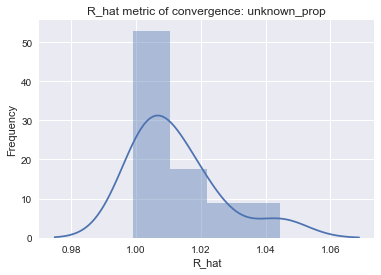

In [160]:
model_check.plot_stan_summary_metric(STAN_SUMMARY, metrics[0], parameters[1])

count    130.000000
mean       0.051134
std        0.016958
min        0.033157
25%        0.040645
50%        0.044756
75%        0.052527
max        0.114029
dtype: float64
130 (130,)
130 (130,)


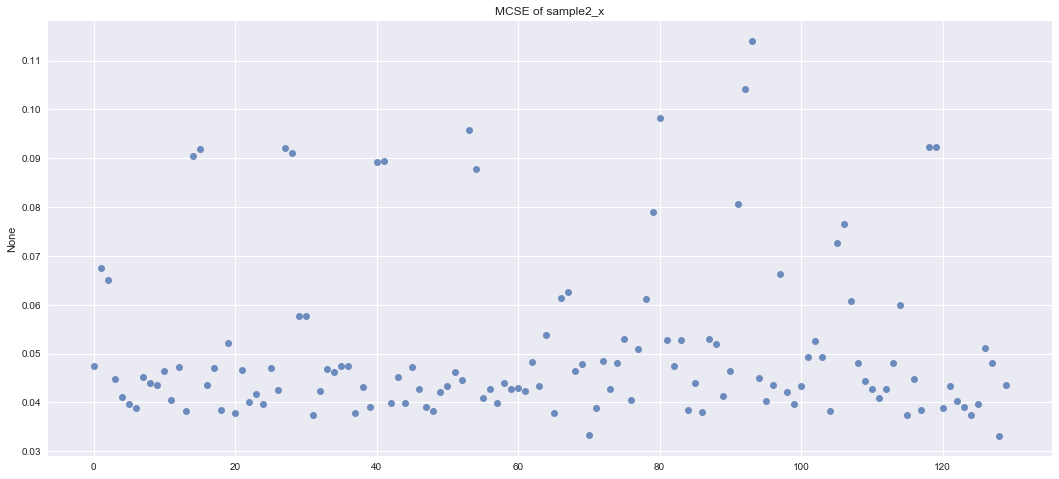

In [161]:
model_check.analyze_mcse(STAN_SUMMARY, parameters[2])

# Test data-munging code


In [7]:
STAN_PARAMETER_NAMES

{'cell_types_prefix': 'sample2_x', 'unknown_prefix': 'unknown_prop'}

In [138]:
traces_df = stansummary_data.traces_to_dataset(trace_filenames_list, STAN_SUMMARY)

/Users/eliza/hammerlab/infino-private/infino/stansummary_data.py:65: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Pre-warmup
min      0.0
max    999.0
Name: iter, dtype: float64
Post-warmup
min      0.0
max    999.0
Name: iter, dtype: float64


/Users/eliza/hammerlab/infino-private/infino/stansummary_data.py:119: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  ### unknown prop df


In [139]:
traces_df.head()

,sample_id,combined_iter_number,subset_name,estimate,type
0,1,0,B CD5,0.001896,subset
1,1,1,B CD5,0.002584,subset
2,1,2,B CD5,0.069244,subset
3,1,3,B CD5,0.026420,subset
4,1,4,B CD5,0.027511,subset


In [140]:
traces_df.tail()

,sample_id,combined_iter_number,subset_name,estimate,type
559995,10,3995,Unknown,0.028199,Unknown
559996,10,3996,Unknown,0.023559,Unknown
559997,10,3997,Unknown,0.024092,Unknown
559998,10,3998,Unknown,0.028276,Unknown
559999,10,3999,Unknown,0.030424,Unknown


# Test Plotting Code

In [48]:
from infino.plot_dataset import PlotDataset

In [47]:
cibersort_df, cibersort_rollup_df = cibersort_data.get_cibersort_dfs(path.join(CIBERSORT_DATA_DIR, 'all_cohorts.cibersort_results.tsv'))

(<seaborn.axisgrid.FacetGrid at 0x154bbcba8>,
 <matplotlib.figure.Figure at 0x154ca2f28>)

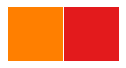

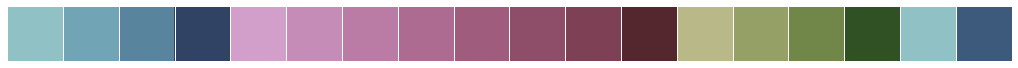

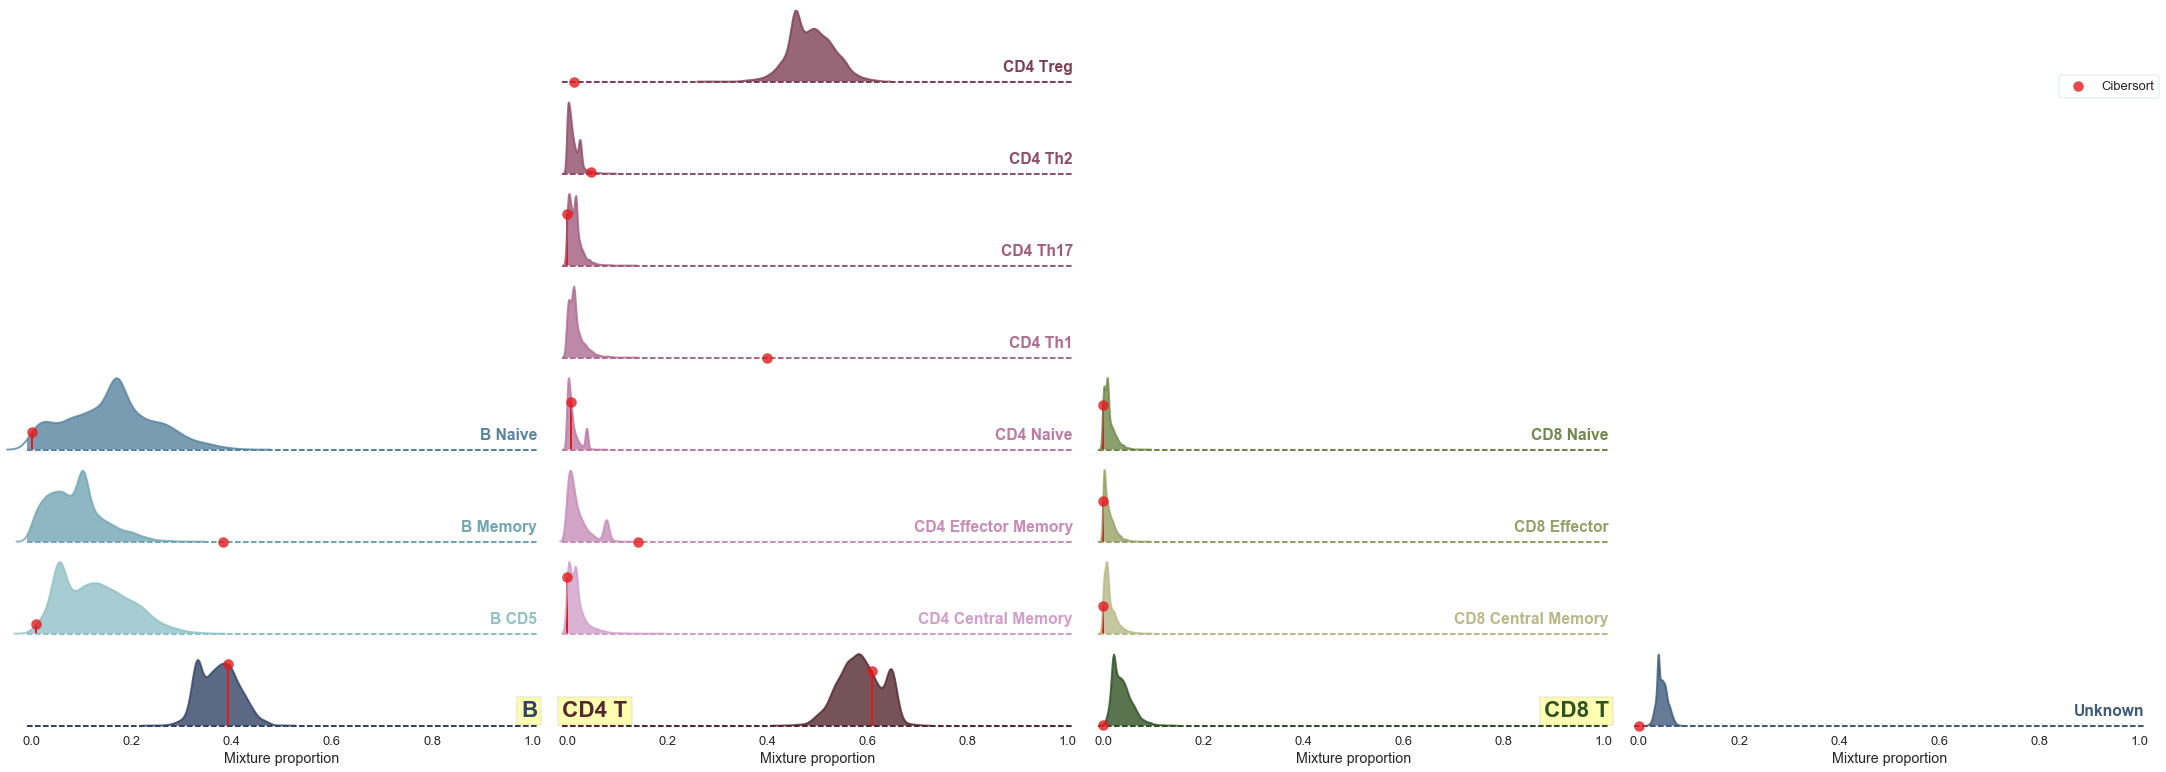

In [144]:
my_pd = PlotDataset(7, traces_df, cibersort_df, cibersort_rollup_df)
my_pd.plot_mcmc_areas()

(<seaborn.axisgrid.FacetGrid at 0x169181048>,
 <matplotlib.figure.Figure at 0x169181438>)

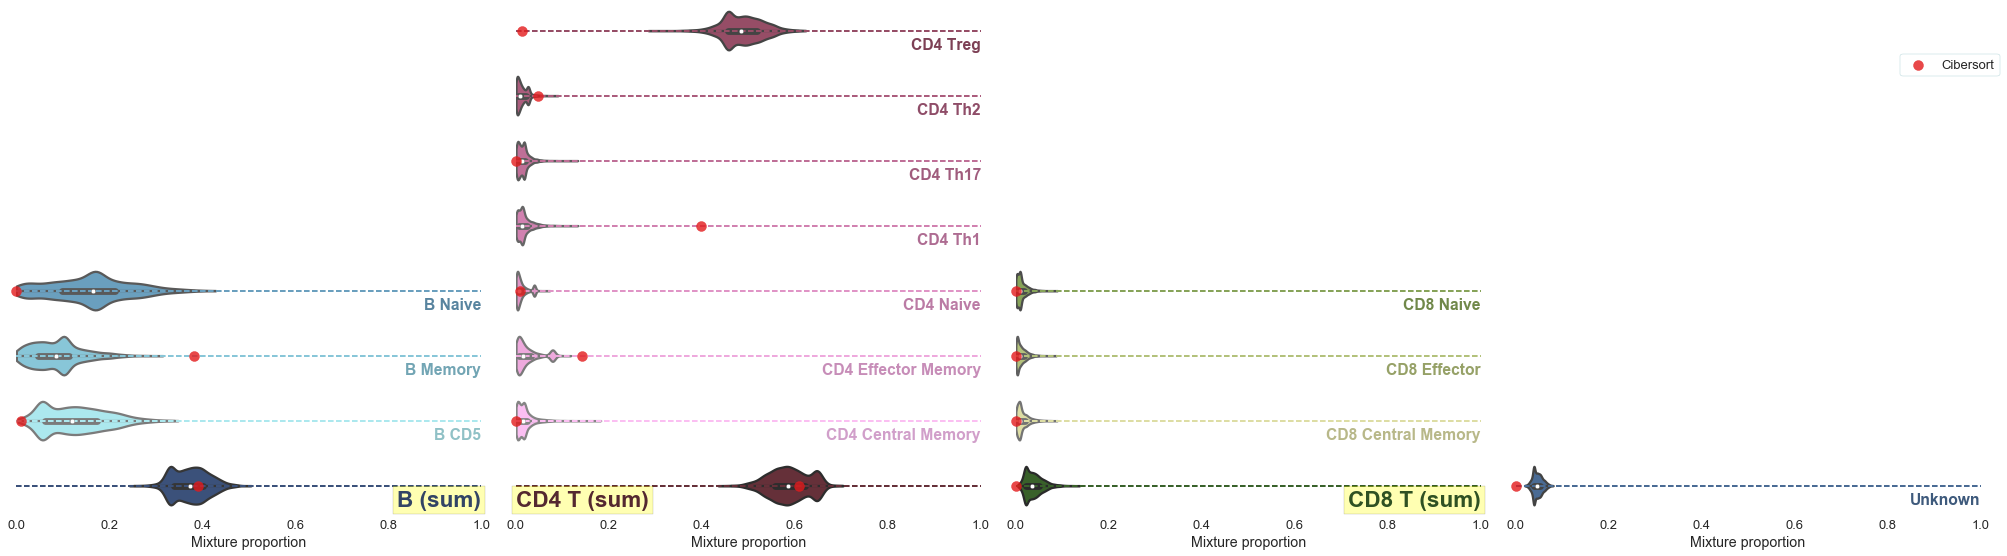

In [136]:
my_pd.plot_violins()

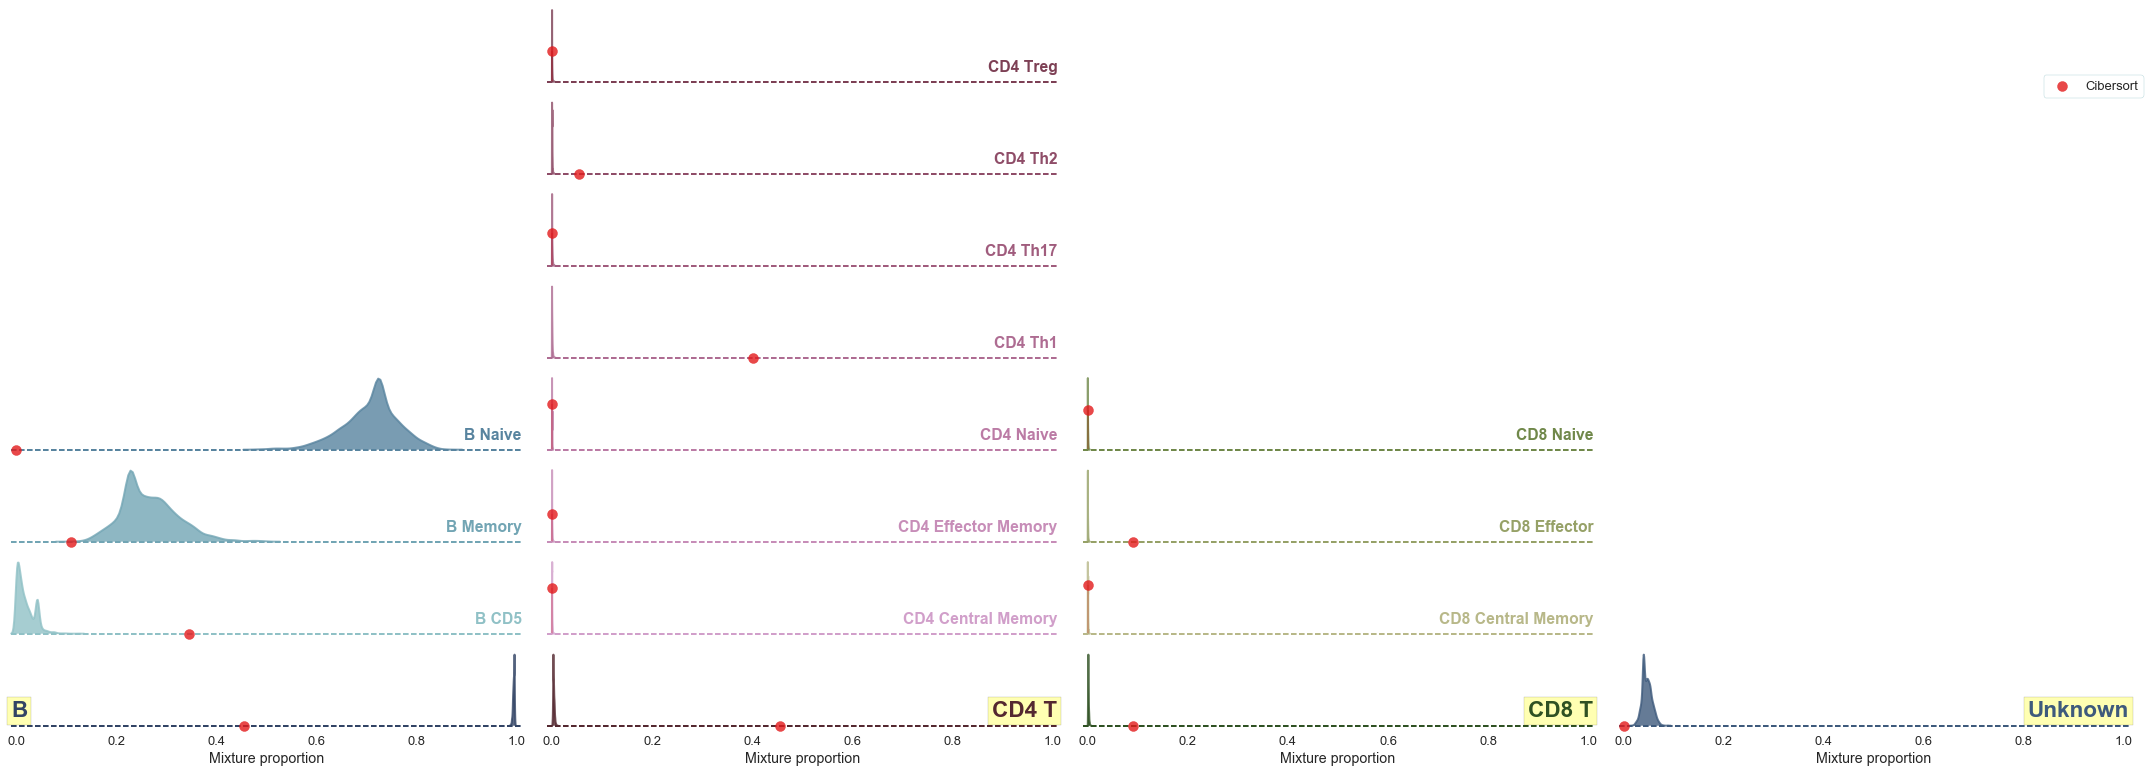

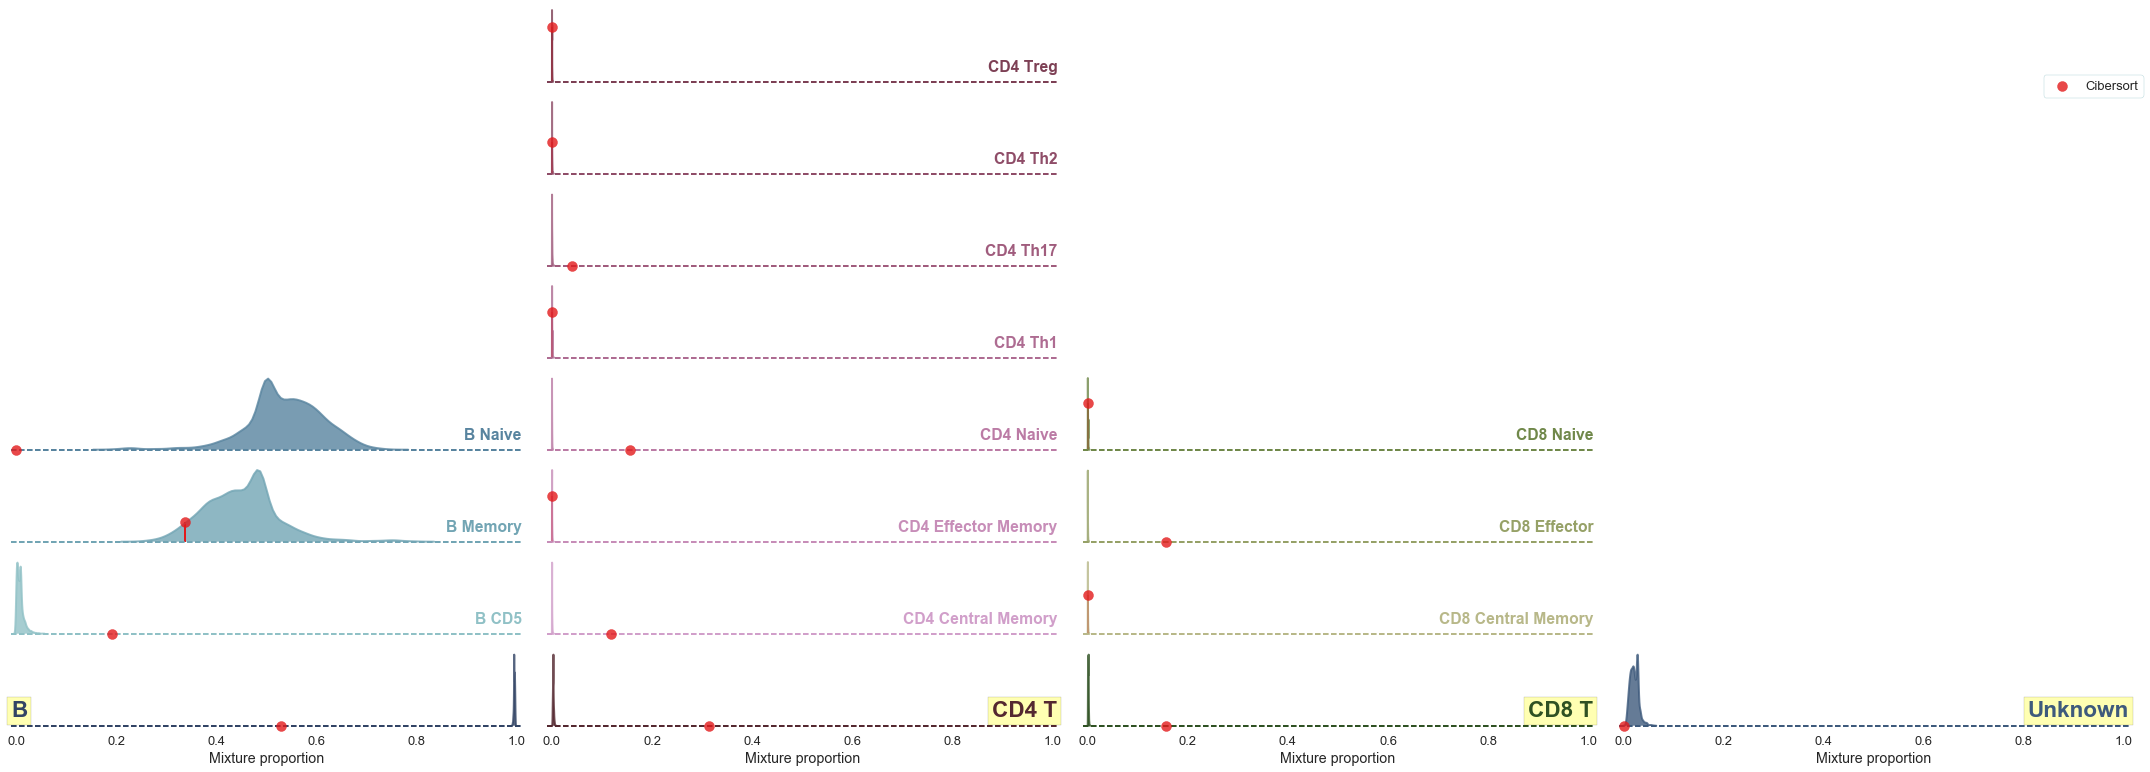

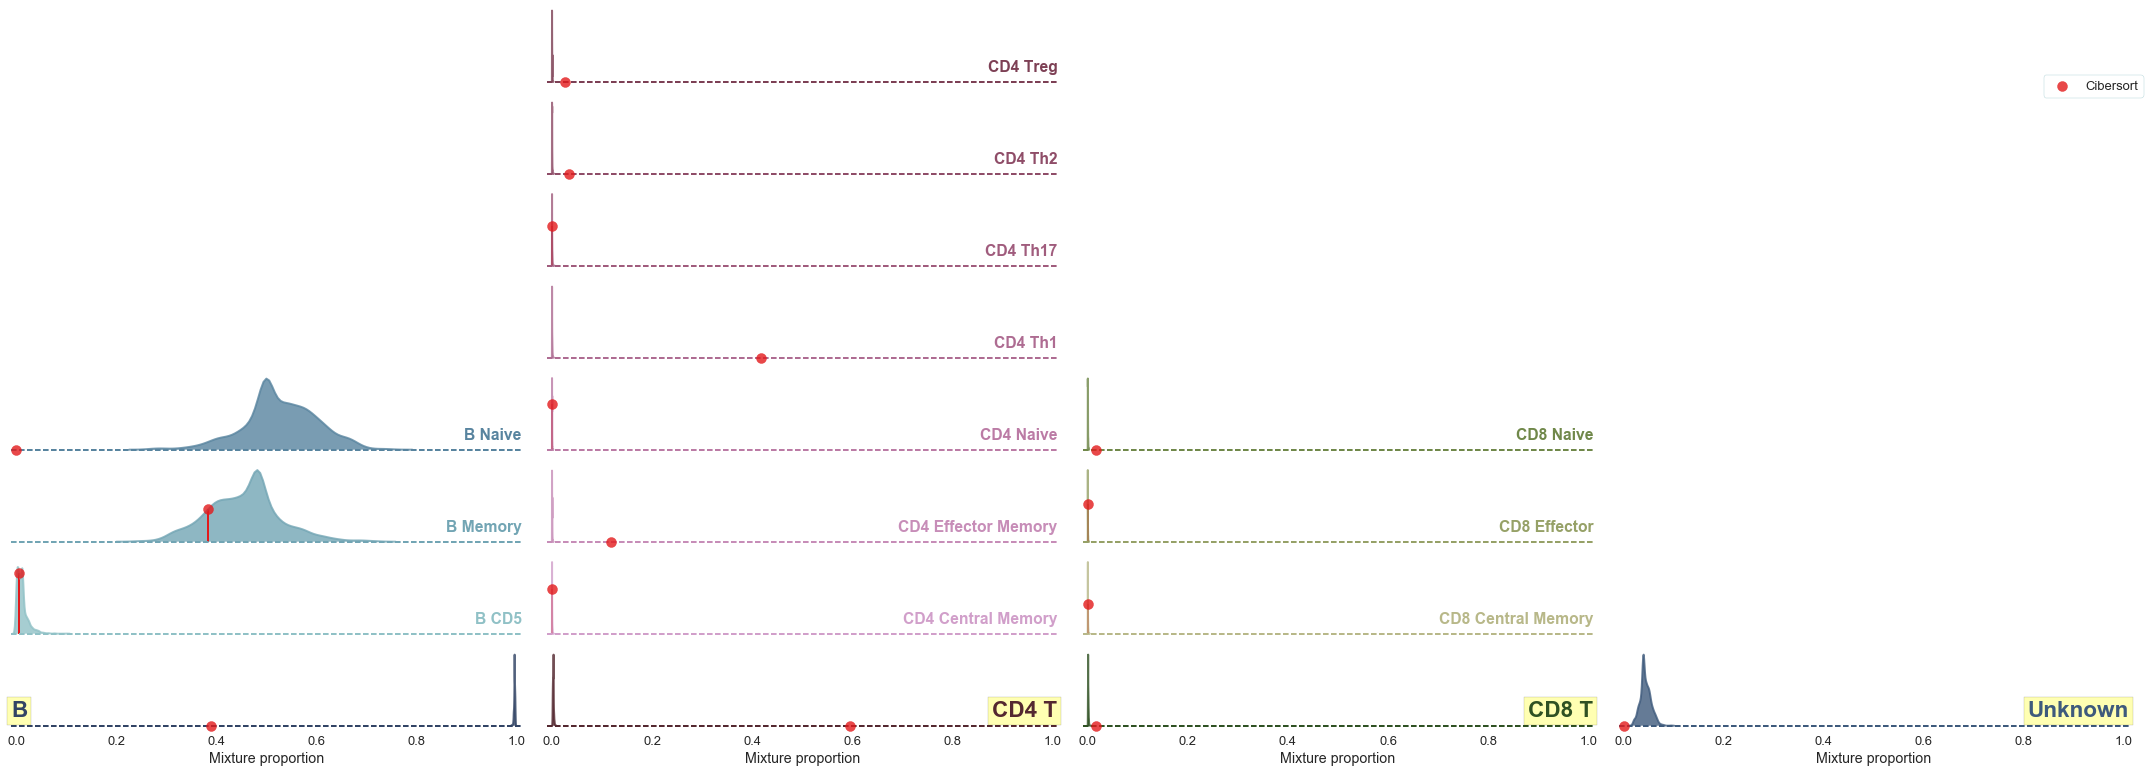

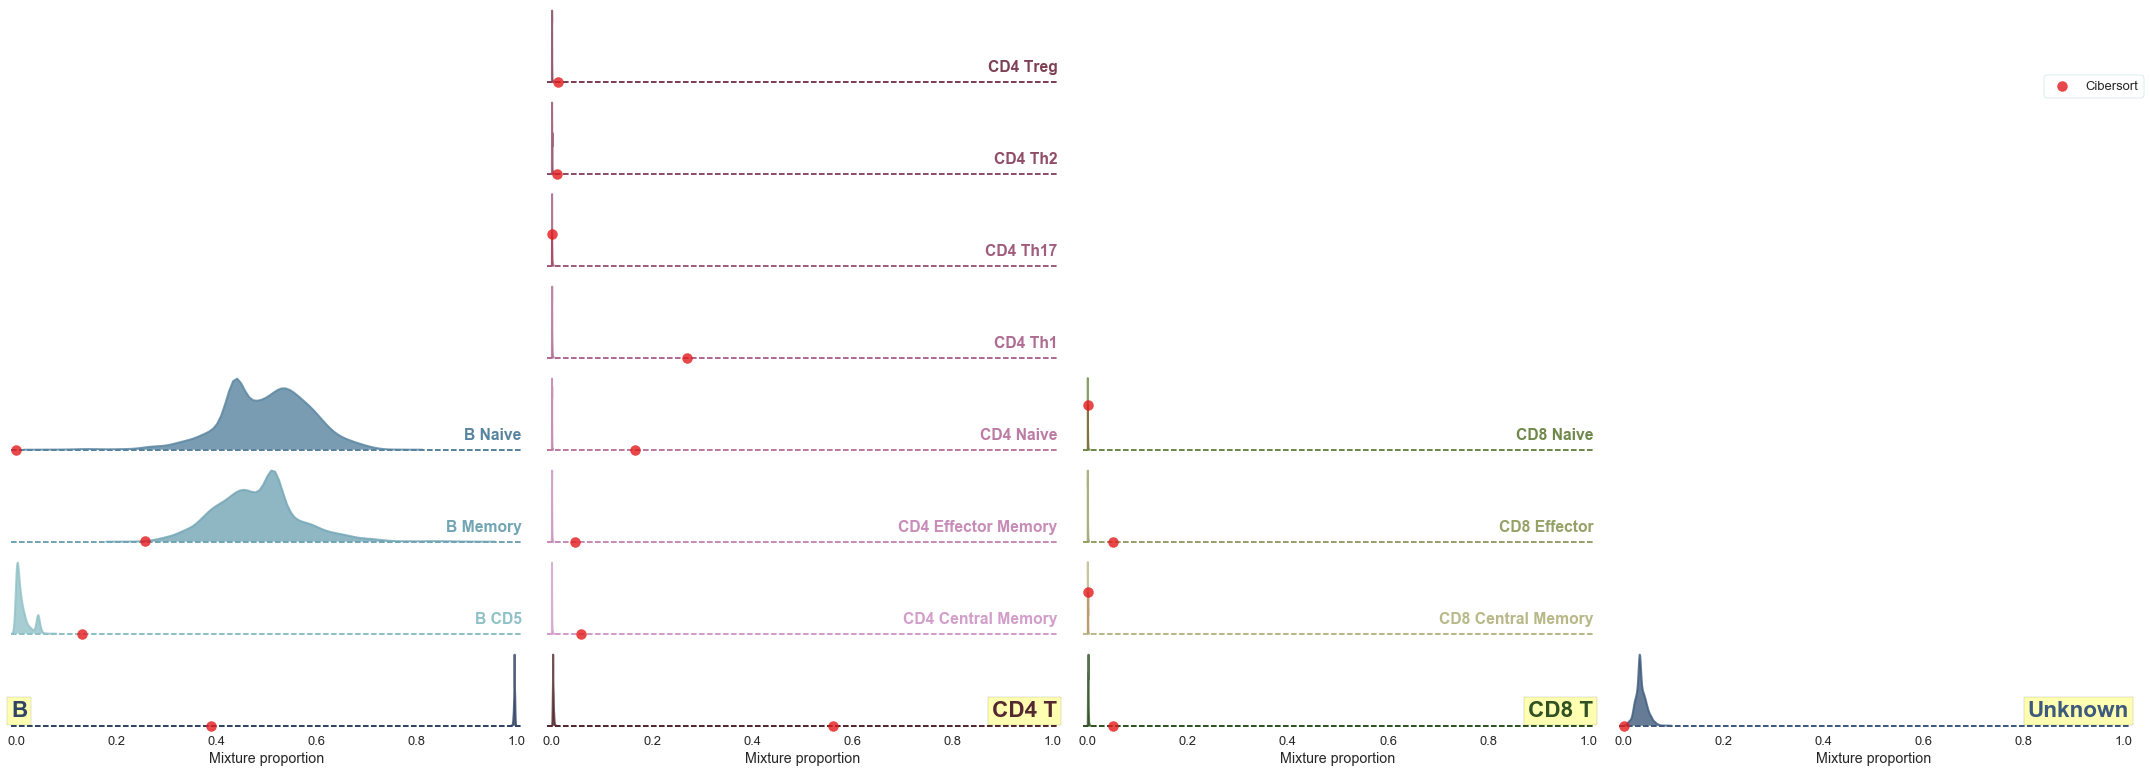

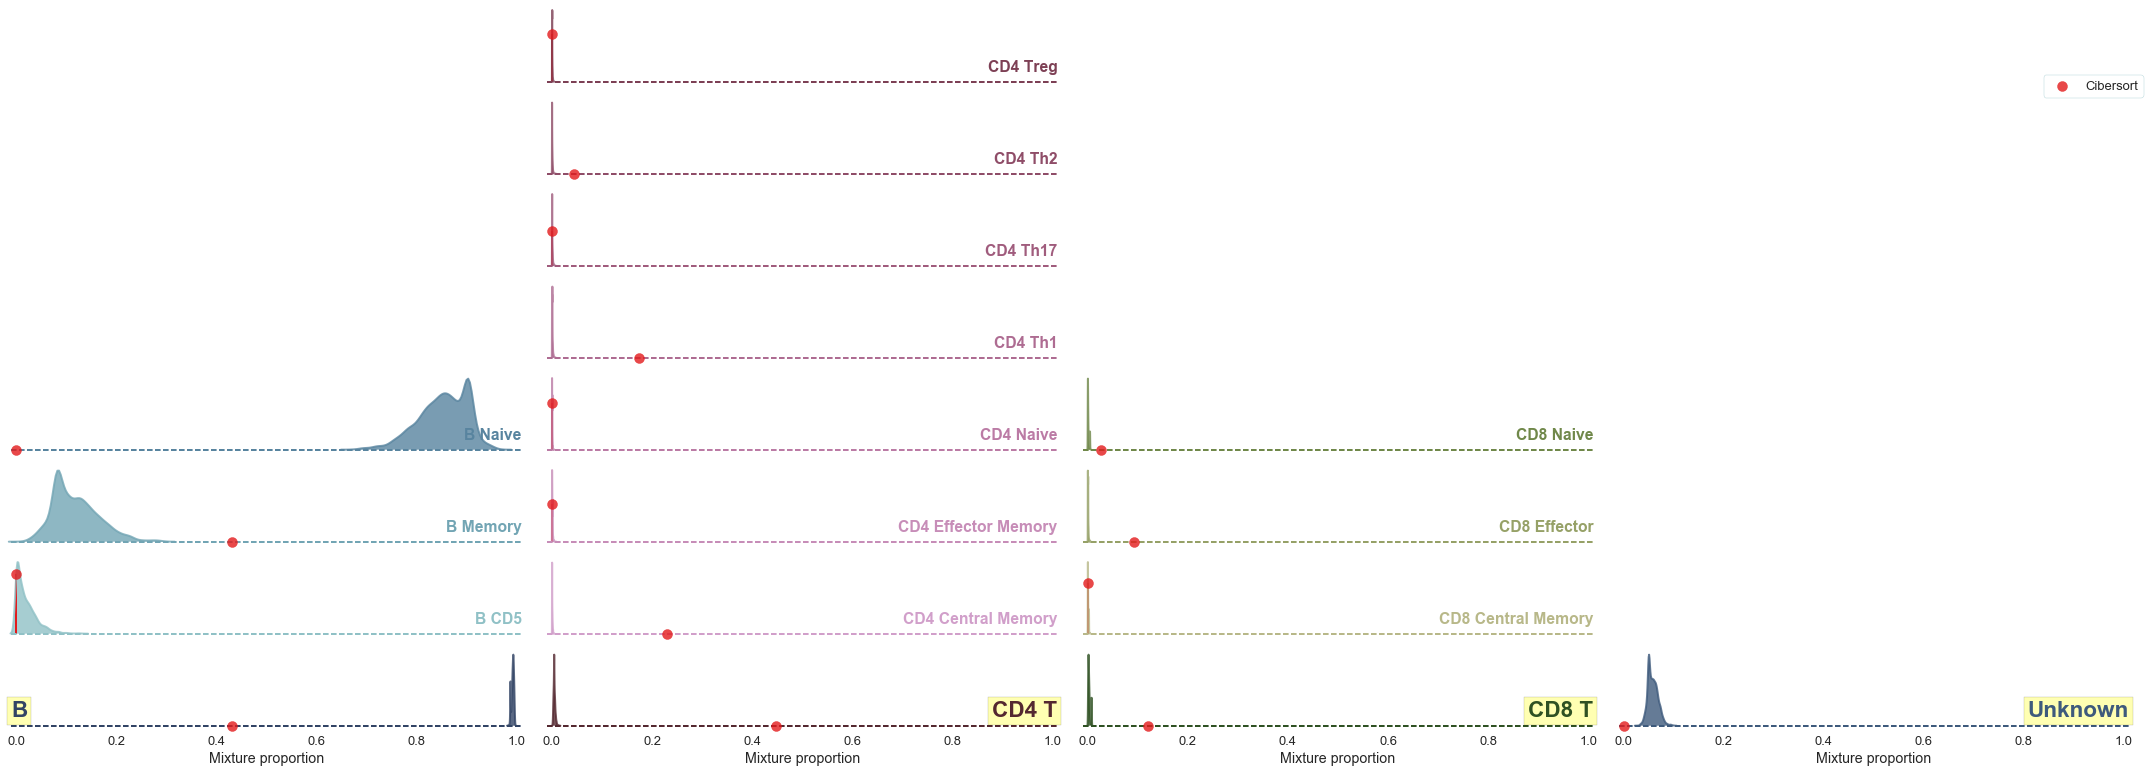

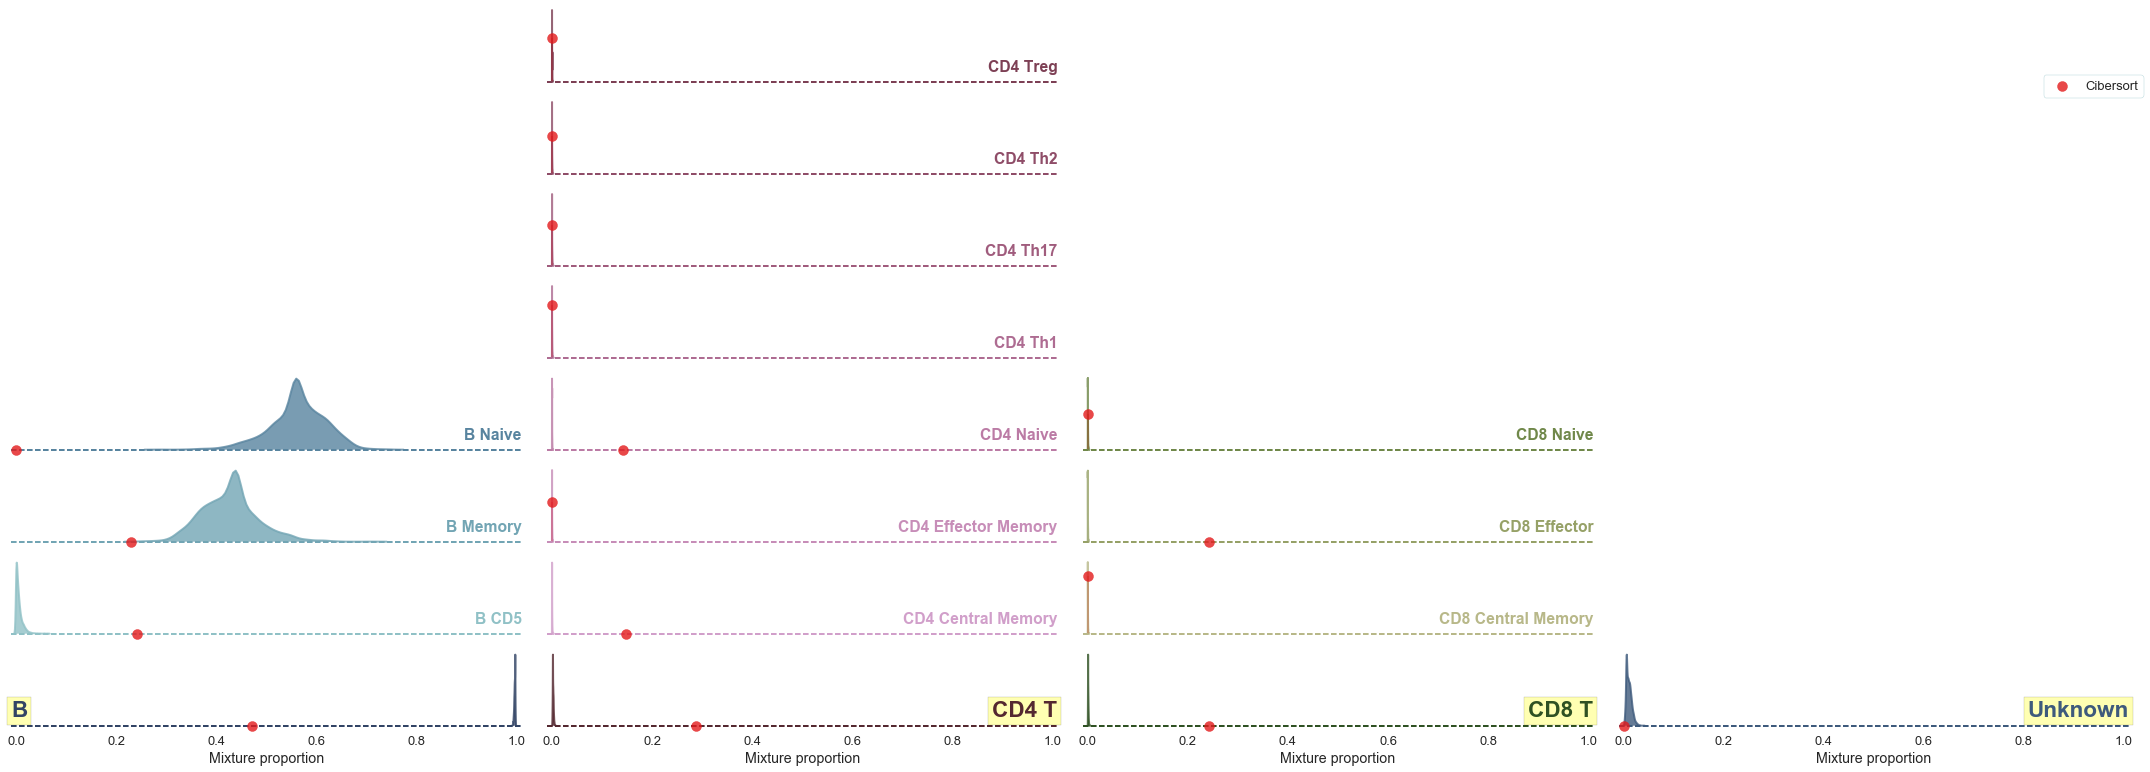

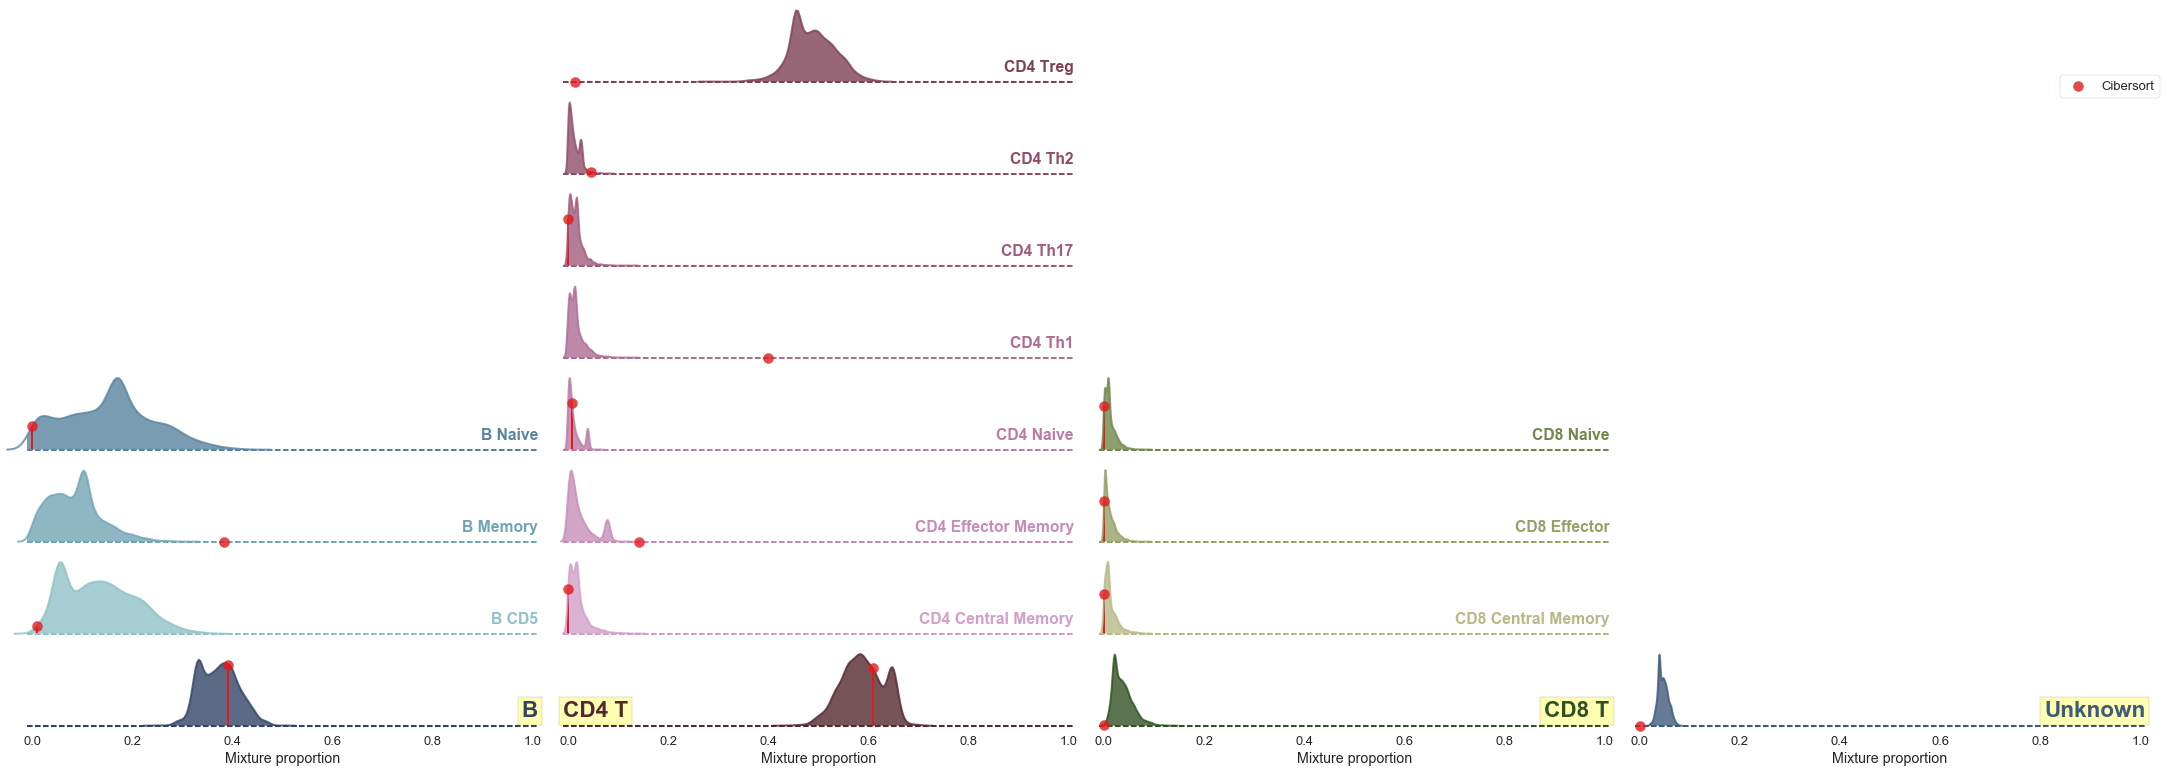

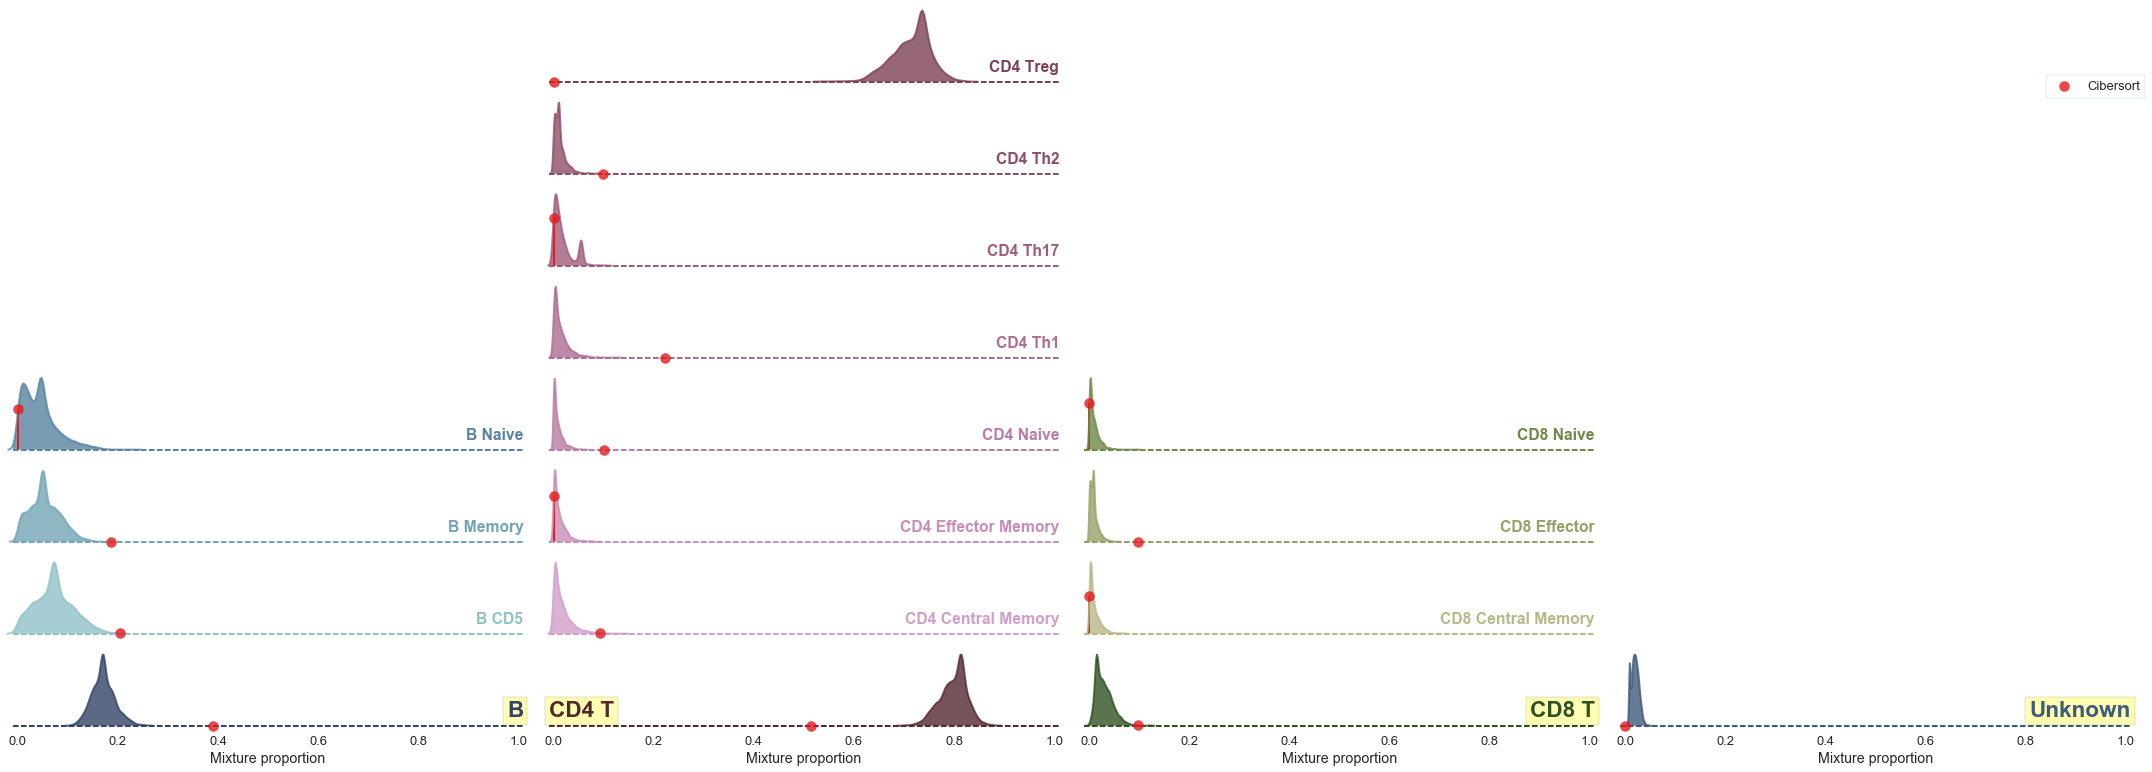

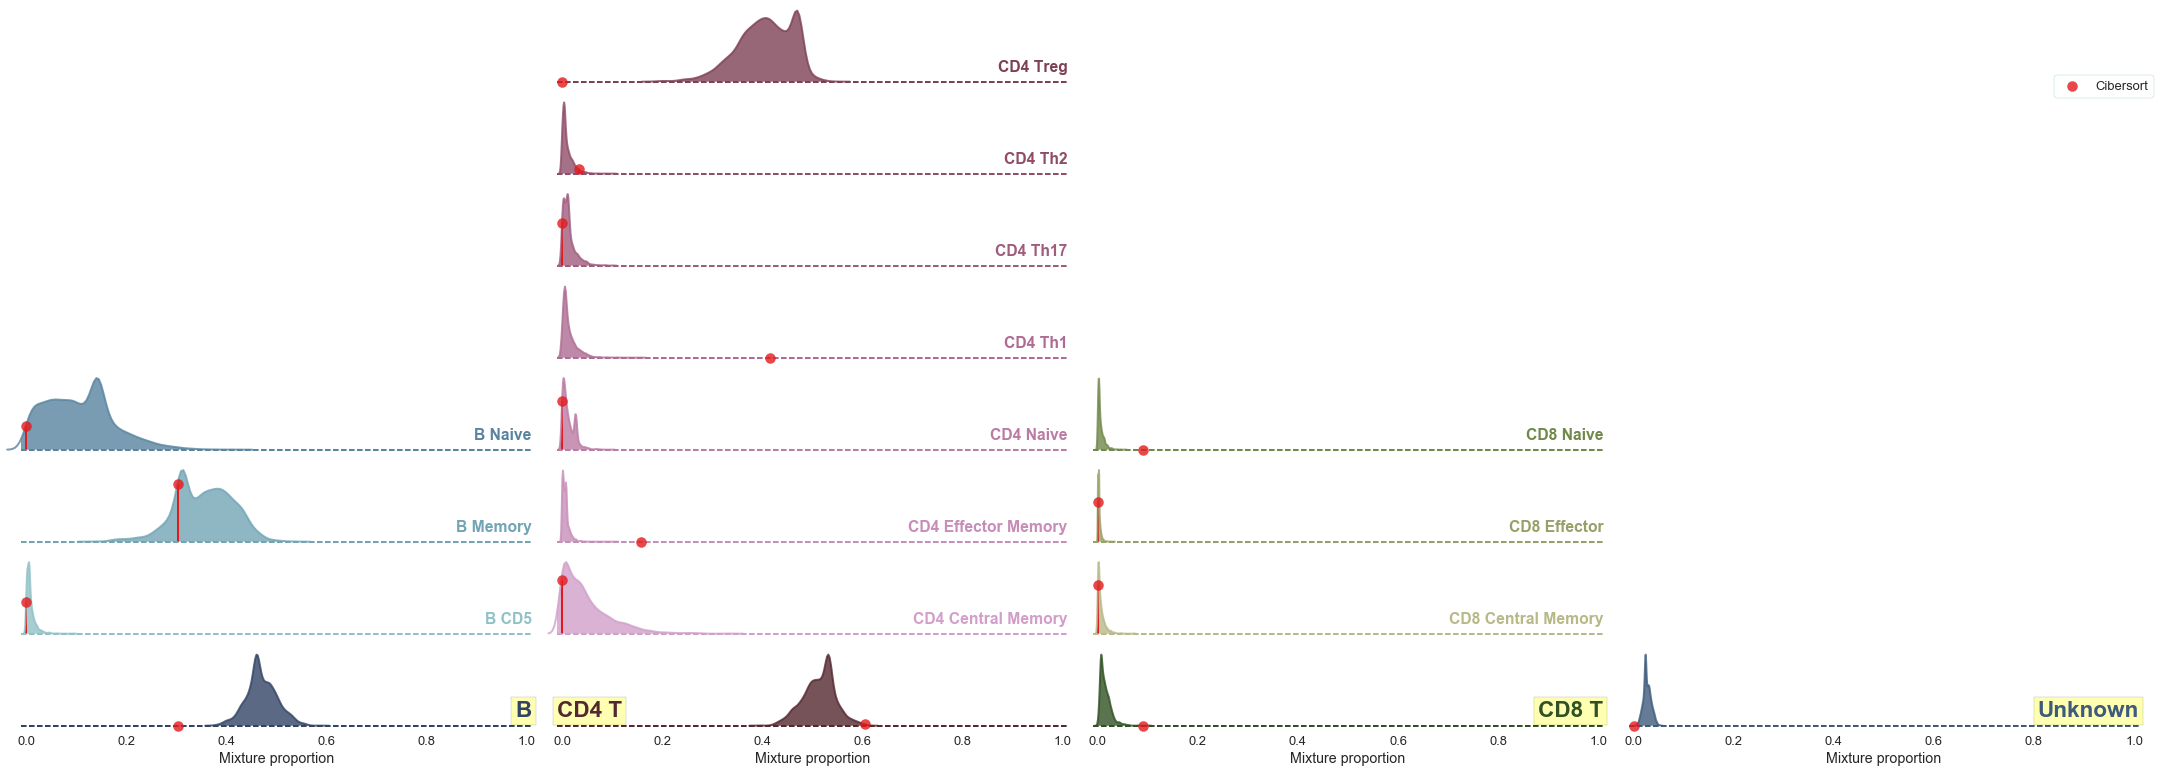

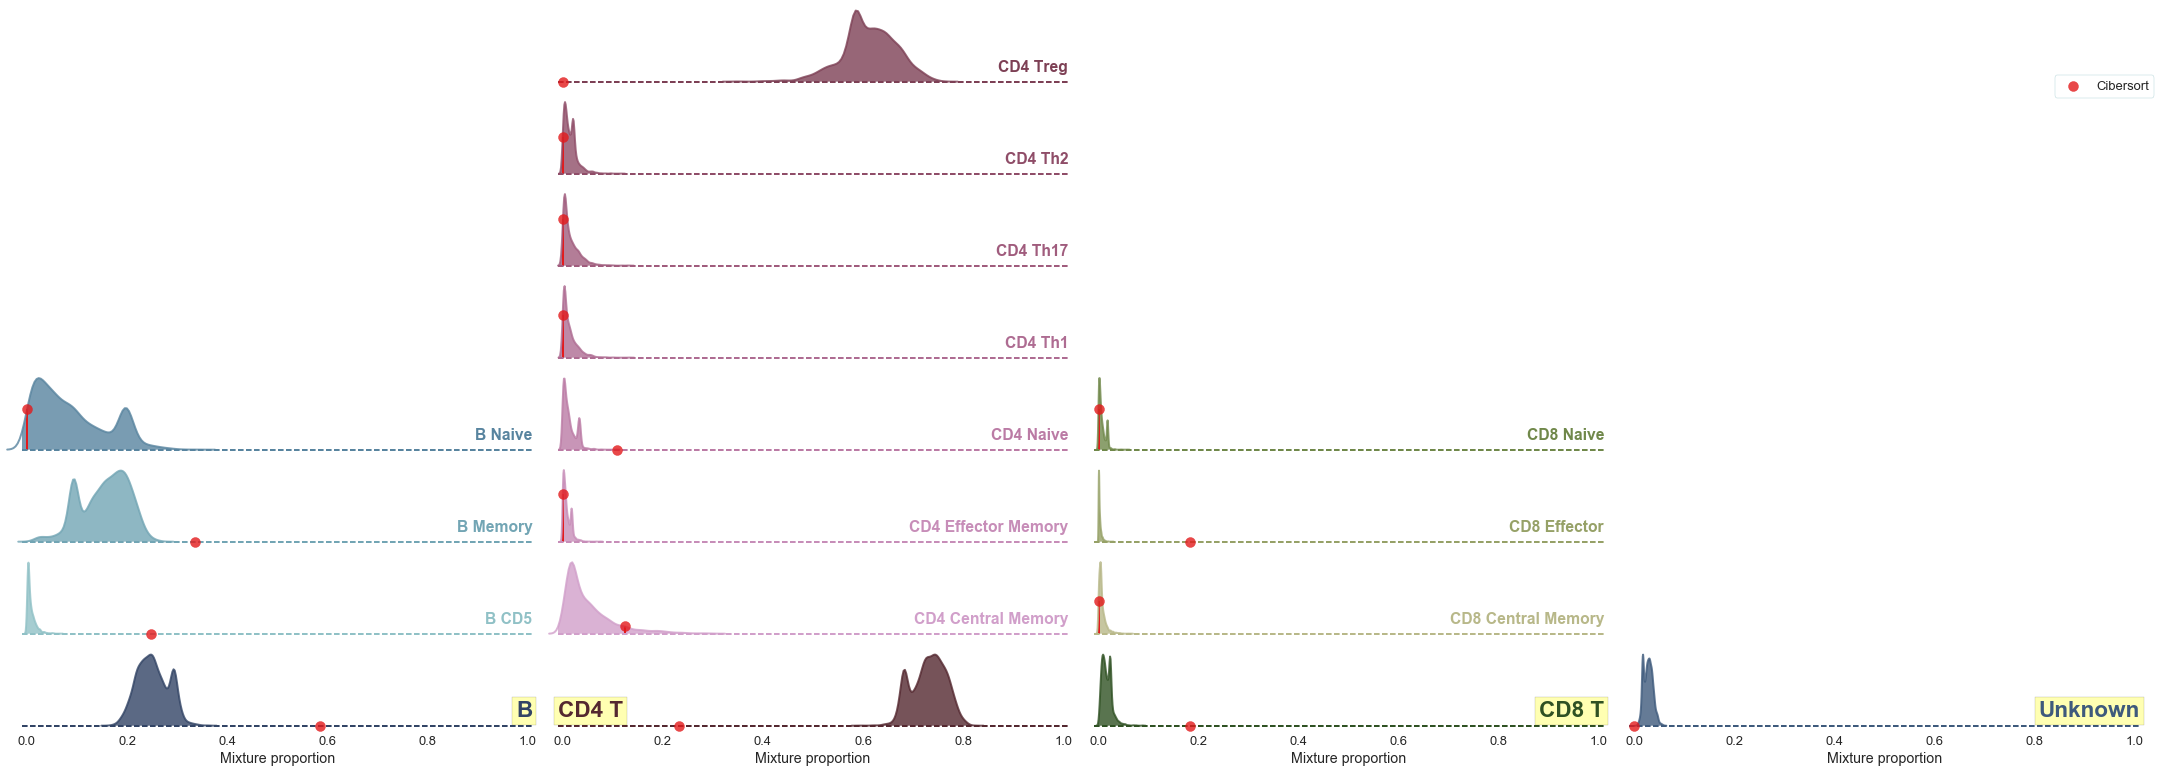

In [18]:
mixture_pds = {}

for i in range(1,11):
    my_pd_i = PlotDataset(i, trace_samples_df, cibersort_df, cibersort_rollup_df)
    mixture_pds[i] = my_pd_i
    #my_pd_i.plot_mcmc_areas()